In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


## Get the data

In [2]:
movie_reviews = pd.read_csv("C:\work\datasets\IMDBDataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [3]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)


In [5]:

movie_reviews["review"][3]


"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

## Clean the data

In [6]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))
    
    

In [7]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [8]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [9]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
X_train[1]

'I did not watch the entire movie could not watch the entire movie stopped the DVD after watching for half an hour and suggest anyone thinking of watching themselves it stop themselves before taking the disc out of the case like Mafia movies both tragic and comic but Corky Romano can only be described as tragic attempt at mafia comedy The problem is Corky Romano simply tries too hard to get the audience to laugh the plot seems to be an excuse for moving Chris Kattan Corky from one scene to another Corky himself is completely overplayed and lacks subtlety or credulity all his strange mannerisms come across as contrived Chris Kattan is clearly acting rather than taking role it bounces you right out of the story Each scene is utterly predictable the comedic event that will occur on the set is obvious as soon as each scene is introduced In comedies such as Mr Bean the disasters caused by the title character are funny because you can empathise with the characters motivations and initial eve

In [11]:
y_train[1]

0

## Data representation 

In [12]:
# Convert the text to a list of integer values corresponding to the word index
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [13]:
X_train[1]


[124,
 113,
 19,
 99,
 1,
 435,
 12,
 91,
 19,
 99,
 1,
 435,
 12,
 2254,
 1,
 257,
 96,
 145,
 13,
 300,
 30,
 517,
 2,
 1427,
 242,
 527,
 3,
 145,
 511,
 6,
 529,
 511,
 159,
 631,
 1,
 3594,
 39,
 3,
 1,
 407,
 34,
 3889,
 93,
 193,
 1616,
 2,
 739,
 15,
 46,
 59,
 25,
 2081,
 11,
 1616,
 585,
 27,
 3889,
 204,
 1,
 438,
 5,
 330,
 498,
 94,
 243,
 4,
 72,
 1,
 296,
 4,
 417,
 1,
 106,
 183,
 4,
 25,
 30,
 1350,
 13,
 695,
 1264,
 33,
 24,
 126,
 4,
 157,
 306,
 5,
 332,
 2,
 1477,
 4085,
 36,
 26,
 22,
 658,
 210,
 608,
 11,
 2057,
 1264,
 5,
 687,
 110,
 246,
 68,
 631,
 214,
 6,
 17,
 200,
 39,
 3,
 1,
 58,
 249,
 126,
 5,
 1280,
 700,
 1,
 1663,
 1560,
 9,
 78,
 3712,
 18,
 1,
 262,
 5,
 570,
 11,
 521,
 11,
 249,
 126,
 5,
 1683,
 7,
 1334,
 137,
 11,
 436,
 4613,
 1,
 2084,
 29,
 1,
 412,
 100,
 20,
 155,
 81,
 17,
 46,
 14,
 1,
 98,
 4696,
 2,
 2508,
 1560,
 2,
 1,
 864,
 1,
 100,
 639,
 51,
 7,
 5,
 19,
 188,
 403,
 1,
 546,
 9,
 21,
 5,
 4342,
 51,
 7,
 1810,
 585,
 4,
 24

In [14]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train.shape

(40000, 100)

### Generate word embeddings using GloVe

In [15]:
from numpy import array
from numpy import asarray
from numpy import zeros

# Generate word embeddings 
embeddings_dictionary = dict()
glove_file = open('C:/work/datasets/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

embeddings_dictionary["watch"]


array([-0.38264  , -0.089682 ,  0.024723 , -0.75717  , -0.47556  ,
        0.61837  , -0.48873  ,  0.61044  , -0.31818  , -0.63448  ,
        0.29585  , -0.016296 ,  0.26651  , -0.57651  ,  0.037018 ,
        0.27653  ,  0.3202   ,  0.34668  , -0.14257  ,  0.079186 ,
       -0.027993 ,  0.1436   ,  0.32445  , -0.34822  ,  0.57161  ,
        0.2056   ,  0.0052677, -0.0092796,  0.7061   ,  0.19237  ,
        0.17404  , -0.014847 ,  0.096184 ,  0.75065  ,  0.38236  ,
        0.11718  , -0.4454   , -0.018317 ,  0.67536  , -0.60288  ,
       -0.30405  ,  0.023487 , -0.36481  , -0.37409  , -0.31277  ,
       -0.028718 , -0.12319  , -0.28882  , -0.18277  , -1.2734   ,
        0.43808  , -0.058079 , -0.11516  ,  0.73796  ,  0.099975 ,
       -2.0191   , -0.10777  ,  0.20513  ,  1.5224   ,  0.16566  ,
       -0.40803  ,  1.171    , -0.015485 , -0.62267  ,  0.29923  ,
        0.51416  , -0.042769 ,  0.6814   ,  0.12516  ,  0.48709  ,
        0.27994  , -0.45281  ,  0.38514  , -0.16599  ,  0.0296

In [16]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix[99]

array([-0.38264   , -0.089682  ,  0.024723  , -0.75717002, -0.47556001,
        0.61837   , -0.48873001,  0.61044002, -0.31817999, -0.63448   ,
        0.29585001, -0.016296  ,  0.26651001, -0.57651001,  0.037018  ,
        0.27653   ,  0.3202    ,  0.34667999, -0.14257   ,  0.079186  ,
       -0.027993  ,  0.1436    ,  0.32444999, -0.34821999,  0.57160997,
        0.20559999,  0.0052677 , -0.0092796 ,  0.70609999,  0.19237   ,
        0.17404   , -0.014847  ,  0.096184  ,  0.75064999,  0.38236001,
        0.11718   , -0.4454    , -0.018317  ,  0.67536002, -0.60288   ,
       -0.30405   ,  0.023487  , -0.36480999, -0.37408999, -0.31277001,
       -0.028718  , -0.12319   , -0.28882   , -0.18277   , -1.27339995,
        0.43808001, -0.058079  , -0.11516   ,  0.73795998,  0.099975  ,
       -2.01909995, -0.10777   ,  0.20513   ,  1.52240002,  0.16565999,
       -0.40803   ,  1.171     , -0.015485  , -0.62266999,  0.29923001,
        0.51415998, -0.042769  ,  0.6814    ,  0.12515999,  0.48

In [17]:
embedding_matrix.shape

(92547, 100)

In [18]:
vocab_size

92547

## Machine Learning Model

In [19]:

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

W0822 16:24:50.536303  1524 deprecation_wrapper.py:119] From C:\Users\acaho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 16:24:50.590263  1524 deprecation_wrapper.py:119] From C:\Users\acaho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 16:24:50.596263  1524 deprecation_wrapper.py:119] From C:\Users\acaho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 16:24:50.614253  1524 deprecation_wrapper.py:119] From C:\Users\acaho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0822 16:24:50.616247  1524 deprecation_wrapper.py:119] 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________
None


## Inspection. Evaluate the model

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 124s 4ms/step - loss: 0.5749 - acc: 0.6908 - val_loss: 0.4833 - val_acc: 0.7796
Epoch 2/6
32000/32000 [==============================] - 121s 4ms/step - loss: 0.4536 - acc: 0.7890 - val_loss: 0.4205 - val_acc: 0.8101
Epoch 3/6
32000/32000 [==============================] - 116s 4ms/step - loss: 0.4051 - acc: 0.8166 - val_loss: 0.3816 - val_acc: 0.8296
Epoch 4/6
32000/32000 [==============================] - 125s 4ms/step - loss: 0.3774 - acc: 0.8307 - val_loss: 0.3632 - val_acc: 0.8370
Epoch 5/6
32000/32000 [==============================] - 112s 3ms/step - loss: 0.3526 - acc: 0.8430 - val_loss: 0.3494 - val_acc: 0.8429
Epoch 6/6
10000/10000 [==============================] - 13s 1ms/step


In [21]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.8471


### Plot the loss and the accuracy for training and test sets. Check for overfitting


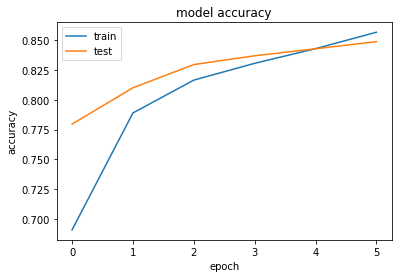

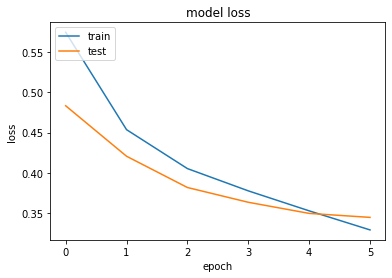

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Make predictions. Follow the same transformations

In [28]:
#instance = X[100]
some_text = "great work life balance, supervisor was amazing. training was very thorough and I was not thrown into the position until i was 100% ready, advancement opportunities were available and encouraged"
X1 = some_text
print(instance)

[[4057  128  767  128  147  128  124 2189 2798 4538  128  124  124 2189
  4057  128  767 3168 1674 4538 2798 3940 4538 3940 2189  128  441  124
  4057  128  767 3940 2798 2798 4538 3940 4057  124 2798 3940 2798 1674
  4962 3940  767  124 2798  124 3940 2798  124  124 4057  128  767 4538
  1674  128  441  128  441 3168  128 2965 1674  147 1674 2798 3940 4962
  4962 3940 4538 2798  124 2798  124 1674  767 4057 1674 4538 1674  128
  3168  128  124  128 1957 1674  128  441 1674 2965 3940 4538  128 2189
  1674  441]]


In [30]:
# Do the same transformations as for the training set
X1 = tokenizer.texts_to_sequences(X1)

flat_list = []
for sublist in X1:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

X1 = pad_sequences(flat_list, padding='post', maxlen=maxlen)


In [31]:
X1

array([[4057,  128,  767,  128,  147,  128,  124, 2189, 2798, 4538,  128,
         124,  124, 2189, 4057,  128,  767, 3168, 1674, 4538, 2798, 3940,
        4538, 3940, 2189,  128,  441,  124, 4057,  128,  767, 3940, 2798,
        2798, 4538, 3940, 4057,  124, 2798, 3940, 2798, 1674, 4962, 3940,
         767,  124, 2798,  124, 3940, 2798,  124,  124, 4057,  128,  767,
        4538, 1674,  128,  441,  128,  441, 3168,  128, 2965, 1674,  147,
        1674, 2798, 3940, 4962, 4962, 3940, 4538, 2798,  124, 2798,  124,
        1674,  767, 4057, 1674, 4538, 1674,  128, 3168,  128,  124,  128,
        1957, 1674,  128,  441, 1674, 2965, 3940, 4538,  128, 2189, 1674,
         441]])

In [32]:
prediction = model.predict(X1)
if (prediction[0] > 0.5) :
    print("positive")

positive
